<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10000 entries, 0 to 9999

Data columns (total 14 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   RowNumber        10000 non-null  int64  

 1   CustomerId       10000 non-null  int64  

 2   Surname          10000 non-null  object 

 3   CreditScore      10000 non-null  int64  

 4   Geography        10000 non-null  object 

 5   Gender           10000 non-null  object 

 6   Age              10000 non-null  int64  

 7   Tenure           9091 non-null   float64

 8   Balance          10000 non-null  float64

 9   NumOfProducts    10000 non-null  int64  

 10  HasCrCard        10000 non-null  int64  

 11  IsActiveMember   10000 non-null  int64  

 12  EstimatedSalary  10000 non-null  float64

 13  Exited           10000 non-null  int64  

dtypes: float64(3), int64(8), object(3)

memory usage: 1.1+ MB


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.004504,-0.000062,0.002804,0.011090,-0.003937,0.030947,0.005182,-0.023950
Age,-0.004504,1.000000,-0.013134,0.031481,-0.031877,-0.014129,0.082269,-0.007037,0.283017
Tenure,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,0.002804,0.031481,-0.007911,1.000000,-0.301858,-0.019055,-0.003285,0.014351,0.117218
NumOfProducts,0.011090,-0.031877,0.011979,-0.301858,1.000000,0.005805,0.009084,0.013990,-0.050271
HasCrCard,-0.003937,-0.014129,0.027232,-0.019055,0.005805,1.000000,-0.008810,-0.006136,-0.005411
IsActiveMember,0.030947,0.082269,-0.032178,-0.003285,0.009084,-0.008810,1.000000,-0.020049,-0.155062
EstimatedSalary,0.005182,-0.007037,0.010520,0.014351,0.013990,-0.006136,-0.020049,1.000000,0.016029
Exited,-0.023950,0.283017,-0.016761,0.117218,-0.050271,-0.005411,-0.155062,0.016029,1.000000


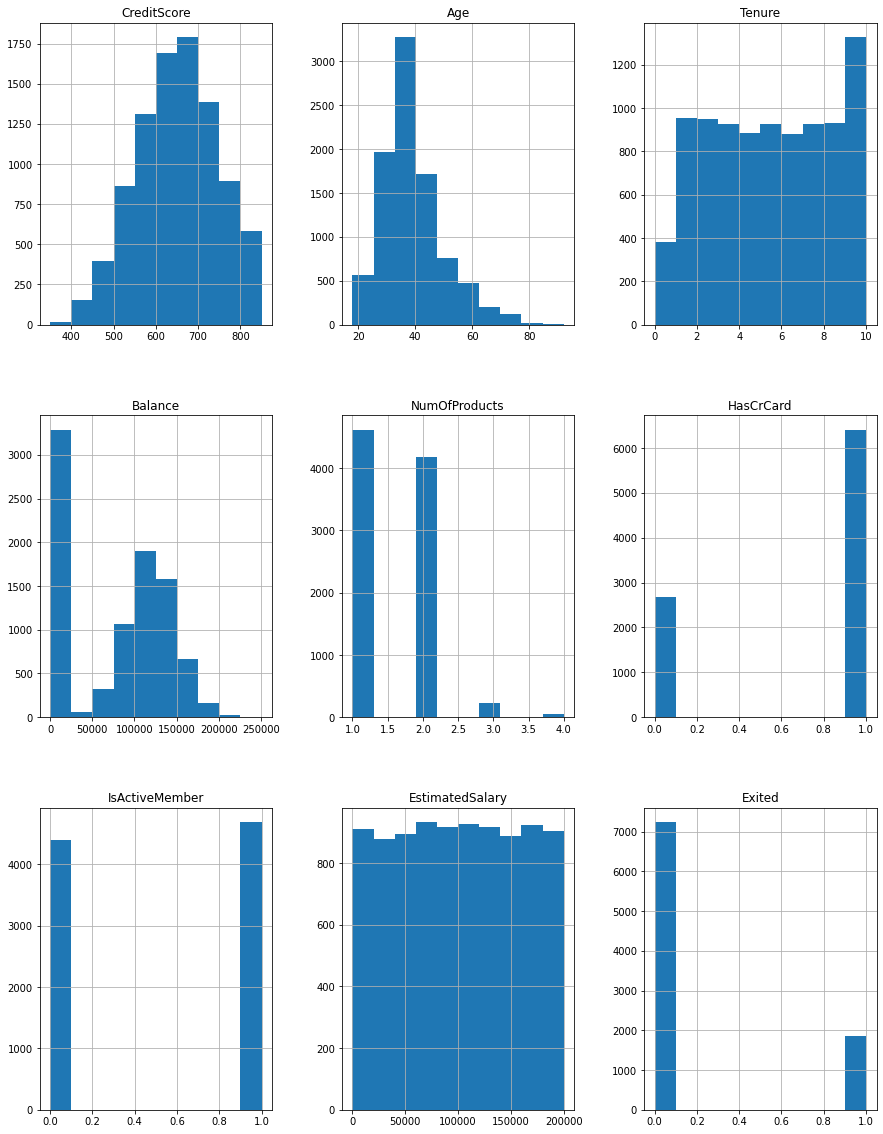

In [3]:
df = pd.read_csv('/datasets/Churn.csv')

df.info()

df = df.dropna(subset=['Tenure'])
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

display(df.corr())

df.hist(figsize=(15,20))
plt.show()

df = pd.get_dummies(df, drop_first=True)

target = df['Exited']
features = df.drop('Exited', axis=1)

features_train, features_intermediate, target_train, target_intermediate = train_test_split(
    features, target, test_size=0.4, random_state=31337, stratify=target)

features_test, features_valid, target_test, target_valid = train_test_split(
    features_intermediate, target_intermediate, test_size=0.5, random_state=31337, stratify=target_intermediate)

In [4]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/tmp/ipykernel_31/1941684496.py:6: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  features_train[numeric] = scaler.transform(features_train[numeric])

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self._setitem_single_column(loc, value[:, i].tolist(), pi)

/tmp/ipykernel_31/1941684496.py:7: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value 

Проверка на пропуски показывает, что таких в столбце Tenure примерно 10%. Пропуски удалены поскольку нет возможности восстановить эту информацию. Коррекция типов данных не нужна и аномалий на графиках не видно.

Столбцы 'RowNumber', 'CustomerId', 'Surname' удалены, поскольку не несут нужной для принятия решений информации.
Сильной зависимости между столбцами матрица корреляции не выявила.

В датасете осталось два категориальных признака - Geography и Gender. Преобразованы OHE методом.

Датасет разделен на обучающую и валидационную выборки. Признаки отмасштабированы.

## Исследование задачи

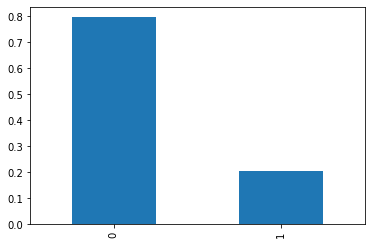

In [5]:
df['Exited'].value_counts(normalize=df.shape[1]/2).plot(kind='bar')
plt.show()

In [6]:
def calc_metrics(prefix, model_arg, featurs_valid_arg, target_valid_arg, draw_curve):
    predicted_valid = model_arg.predict(featurs_valid_arg)
    probabilities_valid = model_arg.predict_proba(featurs_valid_arg)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid_arg, probabilities_one_valid)
    
    print(prefix, 'precision:', precision_score(target_valid_arg, predicted_valid))
    print(prefix, 'recall:', recall_score(target_valid_arg, predicted_valid))
    print(prefix, 'f1:', f1_score(target_valid_arg, predicted_valid))
    print(prefix, 'AUC-ROC:', auc_roc)
    
    if draw_curve:
        fpr, tpr, thresholds = roc_curve(target_valid_arg, probabilities_one_valid)
        plt.figure()
        plt.plot(fpr, tpr)
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.show()        

model = DecisionTreeClassifier(random_state=31337)
model.fit(features_train, target_train)
calc_metrics('DT', model, features_valid, target_valid, False)

DT precision: 0.48166259168704156

DT recall: 0.5309973045822103

DT f1: 0.5051282051282051

DT AUC-ROC: 0.6922942324016024


In [7]:
model = LogisticRegression(random_state=31337)
model.fit(features_train, target_train)
calc_metrics('LR', model, features_valid, target_valid, False)

LR precision: 0.5771812080536913

LR recall: 0.23180592991913745

LR f1: 0.3307692307692307

LR AUC-ROC: 0.7613419755476463


В данных наблюдается сильный дисбалланс классов целевого признака в сторону отрицательных. Что очевидно, впрочем, конечно же у нас больше оставшихся клиентов банка, нежели ушедших, в ином случае исследование было бы поздно делать. Дерево показывает лучшие результаты, чем логистическая регрессия, в которой полнота имеет очень низкое значение. Однако даже в случае с деревом метрика f1 все еще недостаточно велика.

## Борьба с дисбалансом

In [8]:
def change_sample(features_arg, targets_arg, repeat, random):   
    features_zeros = features_arg[targets_arg == 0] #.sample(frac=0.9, random_state=random)
    features_ones = features_arg[targets_arg == 1]
    target_zeros = targets_arg[targets_arg == 0] #.sample(frac=0.9, random_state=random)
    target_ones = targets_arg[targets_arg == 1]
    
    features_up = pd.concat([features_zeros] + [features_ones] * repeat)
    target_up = pd.concat([target_zeros] + [target_ones] * repeat)
    
    return shuffle(features_up, target_up, random_state=random)

In [9]:
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=31337)
model.fit(features_train, target_train)
calc_metrics('LR+Weight', model, features_valid, target_valid, False)

LR+Weight precision: 0.37813884785819796

LR+Weight recall: 0.6900269541778976

LR+Weight f1: 0.48854961832061067

LR+Weight AUC-ROC: 0.7633821536537059


In [10]:
print()
print('=====Before resampling=====')
print('ones:', features_train[target_train==1].shape, 'zeros:', features_train[target_train==0].shape)

features_mod, target_mod = change_sample(features_train, target_train, 5, 31337)

print()
print('=====After resampling=====')
print('ones:', features_mod[target_mod==1].shape, 'zeros:', features_mod[target_mod==0].shape)
print()



=====Before resampling=====

ones: (1112, 11) zeros: (4342, 11)



=====After resampling=====

ones: (4448, 11) zeros: (4342, 11)




#Cell is converted to markdown in order not to execute it everytime

stored_d = 0
stored_e = 0
best_f1 = 0

for est in range(1, 200, 5):
    for depth in range(1, 40, 2):
        model = RandomForestClassifier(class_weight='balanced', n_estimators=est, max_depth=depth, random_state=31337)
        model.fit(features_mod, target_mod)
        predicted_valid = model.predict(features_valid)
        calc_f1 = f1_score(target_valid, predicted_valid)

        if calc_f1 > best_f1:
            print('rewrite best from:', best_f1, 'to', calc_f1, 'for depth=', depth, 'and est=', est)
            best_f1 = calc_f1
            stored_d = depth
            stored_e = est

print('best f1 is:', best_f1, 'for depth=', stored_d, 'and est=', stored_e)

In [20]:
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=31337)
model.fit(features_mod, target_mod)
calc_metrics('LR+Weight+Resample', model, features_valid, target_valid, False)
print()

model = DecisionTreeClassifier(class_weight='balanced', random_state=31337)
model.fit(features_mod, target_mod)
calc_metrics('DT+Resample', model, features_valid, target_valid, False)
print()

model = RandomForestClassifier(class_weight='balanced', n_estimators=25, max_depth=11, random_state=31337)
model.fit(features_mod, target_mod)
calc_metrics('RF+Resample', model, features_valid, target_valid, False)

LR+Weight+Resample precision: 0.3775811209439528

LR+Weight+Resample recall: 0.6900269541778976

LR+Weight+Resample f1: 0.48808388941849384

LR+Weight+Resample AUC-ROC: 0.7633654003663385



DT+Resample precision: 0.5

DT+Resample recall: 0.46900269541778977

DT+Resample f1: 0.4840055632823366

DT+Resample AUC-ROC: 0.6744184747807179



RF+Resample precision: 0.5627906976744186

RF+Resample recall: 0.6522911051212938

RF+Resample f1: 0.6042446941323346

RF+Resample AUC-ROC: 0.8410196795282273


В качестве первой попытки решения проблемы дисабаланса использовано взвешивание классов. Метрика f1 и полнота показывают существенное улучшение в сравнении даже с деревом решений.

Следующим шагом решения проблемы выбрано увеличение выборки. Метрики не изменились для логистической регрессии, но немного улучшились для дерева решений.

Следующий шаг - попробовать подобрать гиперпараметры для дерева решений.
С помощью подбора гиперпараметров и выравивания количества классов (убавлено отрицательных и добавлено положительных) удалось довести f1 метрику до 0.5938.
После количества деревьев 9 и глубины 7 метрика расти перестает.

## Тестирование модели

RF on test precision: 0.5682382133995038

RF on test recall: 0.6172506738544474

RF on test f1: 0.5917312661498708

RF on test AUC-ROC: 0.8472758025247887


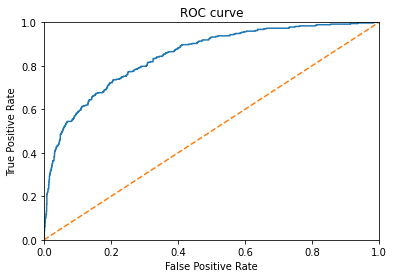

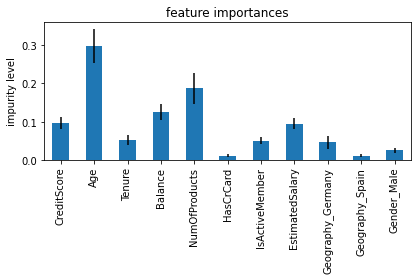

In [22]:
calc_metrics('RF on test', model, features_test, target_test, True)

std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(model.feature_importances_, index=features_test.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("feature importances")
ax.set_ylabel("impurity level")
fig.tight_layout()

Несмотря на то, что метрика f1 не достигла целевого результата, кривая ошибок показывает неплохую картинку и площадь кривой тоже дает довольно высокое значение.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*